# COGS 118A - Final Checkpoint

# Patients' Mortality Rate Prediction

## Group Members

- Qiudi He
- Zhixin Li
- Junming Chen

# Abstract 
- This project aims to address the limited understanding of predictors associated with in-hospital mortality among admitted patients. The goal is to develop and validate a prediction model for all-cause in-hospital mortality in order to improve patient outcomes.

- We use Logistic regression, decision tree, and random forest to develop the prediction model, taking into account various potential predictors. By considering a wide range of factors such as patient demographics, medical history, severity of illness, and treatment interventions, the study aims to capture the complex interplay of variables that contribute to patient outcomes.

- We will split the data into training set, validation set and test set and get the confusion matrix to estimate the power, accuracy of our model. By establishing a robust prediction model, this project seeks to provide healthcare professionals with a valuable tool for identifying patients at higher risk of in-hospital mortality. Such a model can aid in clinical decision-making, resource allocation, and optimizing care strategies to improve patient outcomes.

# Background

Substantial researches have demonstrated significant associations between demographic characteristics, vital signs, comorbidities, laboratory variables, and clinical outcomes of ICU patients.

Impact of demographic characteristics: Previous studies have found that demographic characteristics such as age, gender, race, weight, and height can have a significant impact on patients' health status and clinical outcomes<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote).Age is an important predictive factor, with increasing age being associated with higher disease incidence and mortality rates. Gender and race may also play a role in disease development and outcomes. Weight and height can be associated with conditions like obesity and underweight, which may affect patients' vital signs and disease progression.

Importance of vital signs: Vital signs are crucial indicators for assessing patients' physiological status and health condition. Measures such as heart rate, blood pressure, respiratory rate, body temperature, and oxygen saturation reflect the cardiovascular function, respiratory function, and temperature regulation of patients. Previous research has shown an association between abnormal vital signs and adverse clinical outcomes, including the in-hospital mortality rate <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote).
 

Impact of comorbidities on clinical outcomes: Comorbidities refer to the simultaneous presence of other diseases or pathological conditions in patients. Comorbidities such as hypertension, atrial fibrillation, ischemic heart disease, diabetes, depression, iron-deficiency anemia, hyperlipidemia, chronic kidney disease (CKD), and chronic obstructive pulmonary disease (COPD) play a significant role in patients' health status and disease prognosis. Previous studies have found that these comorbidities may increase the risk of in-hospital mortality<a name="admonish"></a>[<sup>[3]</sup>](#admonishnote)

Predictive ability of laboratory variables: Laboratory variables include blood indicators, urine indicators, and other biochemical markers such as red blood cell count, platelet count, white blood cell count, hemoglobin level, blood glucose level, and electrolyte concentrations. Previous research has shown that these laboratory variables are associated with patients' health status and disease prognosis and can be used to predict clinical outcomes, including the in-hospital mortality rate.

By integrating and further analyzing the findings from previous research, this study aims to delve into the relationship between demographic characteristics, vital signs, comorbidities, laboratory variables, and the in-hospital mortality rate. The goal is to provide more accurate prediction models and information for enhancing clinical decision-making and patient management.

# Problem Statement

The aim of our project is to explore the relationship between demographic characteristics, vital signs, comorbidities, and laboratory variables at admission, as well as laboratory variables during ICU hospitalization, and the in-hospital mortality rate. The primary outcome is the in-hospital mortality rate, which refers to the patients' survival status at the time of discharge.

# Data

You should have a strong idea of what dataset(s) will be used to accomplish this project. 

If you know what (some) of the data you will use, please give the following information for each dataset:
- The link to the dataset we found is: https://www.kaggle.com/datasets/mitishaagarwal/patient 

- The dataset contains 85 variables and 91,713 observations. It contains continuous variables, i.e. age, BMI, heart rate .etc. Also, there are categorical variables, such as gender, ventilated apache, elective surgery .etc(some medical indicators). Some of the remarkable variables are age, BMI, gender, the APACHE II diagnosis for the ICU admission, and we will work out the most critical variables in subsequent studies.

- Data preprocessing is an essential step in preparing raw data for analysis and modeling. Before apply our models, we will perform data cleaning and data transformation, also handle outliers. Basically, we will identify and handle missing data by either removing the incomplete entries or imputing values based on statistical techniques, and remove duplicate records to avoid bias in the analysis. Then normalize or standardize the data to bring all variables to a similar scale, eliminating any bias caused by the differences in their ranges if needed. Also, we will use one-hot encoding to transform categorical variables. Finally, we will Detect and handle outliers that may significantly impact the analysis.

- **We made some changes to the proposal since we notice that the dataset is imbalanced, so we apply oversampling. It is employed in situations where the majority class overwhelms the minority class. The basic idea of oversampling is to interpolate between minority class samples to generate synthetic samples. This technique helps prevent the classifier from being biased towards the majority class and allows the minority class to be adequately represented during model training. Also, the model we choose(Logistic regression, decision tree, and random forest) are Imbalance-Insensitive Models.**


# Proposed Solution

In general, the solution will be the following in steps:  

- Data Processing: Before applying the prediction algorithms, the dataset will undergo preprocessing steps such as handling missing values, encoding categorical variables, oversampling and normalizing numerical features.

- Model Development: 
1. The reason why we use logistic regression is that the outcome of patients is binary, and when the dependent variable is a binary variable, logistic regression is commonly used to predict the probability of a binary outcome based on one or more independent variables.
2. The reason why we use decision tree is that one of the advantages of decision trees is their ability to capture complex non-linear relationships between independent variables and the binary outcome. Decision trees can handle both categorical and numerical variables, making them flexible for various types of data.
3. The reason why we use random forest is that Random forest overcomes some limitations of individual decision trees, such as overfitting and high variance.

- Model Validation and Evaluation: The validation set will be used to assess the performance of the developed prediction model. The model's performance will be evaluated using metrics such as accuracy, precision, recall, and area under the receiver operating characteristic curve (AUC-ROC). The confusion matrix will also be computed to estimate the power and accuracy of the model.

- Implementation Details:

1. Python programming language will be used for implementing the solution.Libraries such as scikit-learn, pandas, and numpy will be leveraged for data preprocessing, model development, and evaluation.

2. The logistic regression model can be implemented using scikit-learn's LogisticRegression class.

3. The decision tree model can be implemented using scikit-learn's DecisionTreeClassifier class.The random forest model can be implemented using scikit-learn's RandomForestClassifier class.

4. By combining multiple algorithms and considering a wide range of predictors, the proposed solution aims to capture.

# Evaluation Metrics

Based on the above background, we want to be able to analyse patients' conditions and accurately predict their probability of death in order to determine their condition. Given input feature vectors such as heart rate, weight, age, presence of heart disease, etc., we can predict their corresponding severity of illness (probability of death).  

 

We use **Recall** to test how much patients in severe health condition our model can predict rightly. And also we will use **Precision** to make sure our model can seperately tell healthy patients with patients in bad condition. We should also use **F-Value** to get a overrall evaluation on our model. 
Here the F-Value $  = (2*recall*precision/(precision + recall ) $. 

Where TP = True Postive, TN = True Negative, FP = False Postive, FN = False Negative. 


## **Data preprocessing**

- First, we fill the missing values in numerical features with the median and remove the patient ID column from the dataset, and perform one hot encoding. It is noted that the ratio of deceased samples to surviving samples in the original dataset is 1:10. Therefore, we specify a sampling ratio of 1:4 to balance the imbalance.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
categrary_columns = dataset.select_dtypes(include=['object'])
categrary_columns

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
3,Caucasian,F,Operating Room / Recovery,admit,CTICU,Cardiovascular,Cardiovascular
4,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Trauma,Trauma
...,...,...,...,...,...,...,...
91708,Caucasian,M,Floor,admit,Cardiac ICU,Sepsis,Cardiovascular
91709,Caucasian,F,Floor,admit,Med-Surg ICU,Sepsis,Cardiovascular
91710,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic
91711,Caucasian,F,Accident & Emergency,admit,Med-Surg ICU,Respiratory,Respiratory


In [4]:
dataset.isnull().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

In [5]:
number_columns = dataset.select_dtypes(exclude=['object'])
number_columns
number_columns_names = number_columns.columns.tolist()
categrary_columns_names = categrary_columns.columns.tolist()

In [6]:
dataset[number_columns_names] = dataset[number_columns_names].fillna(dataset[number_columns_names].median())

In [7]:
number_columns.isnull().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
leukemia                         715
lymphoma                         715
solid_tumor_with_metastasis      715
Unnamed: 83                    91713
hospital_death                     0
Length: 78, dtype: int64

In [8]:
dataset.drop("Unnamed: 83", axis=1, inplace=True)

In [9]:
dataset_selected = dataset.drop(["encounter_id", "patient_id", "hospital_id", "icu_id"], axis=1, inplace=False)

In [10]:
Y = dataset_selected.hospital_death

In [11]:
X = dataset_selected.drop('hospital_death',axis=1)

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import seaborn as sns 

In [13]:
categrary_columns_names_input = X.select_dtypes(include=['object']).columns.tolist()
number_columns_names_input = X.select_dtypes(exclude=['object']).columns.tolist()
columns_transform = ColumnTransformer(transformers=[('categories',OneHotEncoder(),categrary_columns_names_input),
          ('numbers',SimpleImputer(strategy='mean'),number_columns_names_input)])

In [14]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(sampling_strategy={0: sum(Y==1)*4, 1: sum(Y==1)})
X_undersampled, y_undersampled = rus.fit_resample(X, Y)
print(Counter(y_undersampled))
print(X_undersampled.shape)
print(y_undersampled.shape)

Counter({0: 31660, 1: 7915})
(39575, 79)
(39575,)


### **Oversampler**

- SMOTE (Synthetic Minority Over-sampling Technique) is a machine learning algorithm used to address class imbalance problems. It aims to balance class distribution by synthesizing new samples for the minority class. The basic idea of SMOTE is to interpolate between minority class samples to generate synthetic samples.

    Here's a brief overview of the SMOTE algorithm:
    For each minority class sample, find its k nearest neighbors.
    Randomly select one of the nearest neighbors.
    Compute the difference between the selected sample and its nearest neighbor in the feature space.
    Multiply the difference by a random number and add it to the selected sample, creating a new synthetic sample.

    Repeat the above steps until the desired level of balanced samples is achieved.
    SMOTE generates synthetic samples to increase the number of minority class instances, thereby improving the learning capability of machine learning models on the minority class and enhancing overall classification performance.

- Let't see what happend when we use **SMOTE** to deal with the inbalance of the target label hospital_death.

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y)
scaler = StandardScaler()
X_trans = columns_transform.fit_transform(X)
X_scaled = scaler.fit_transform(X_trans)

(15830, 122) (91713, 122)


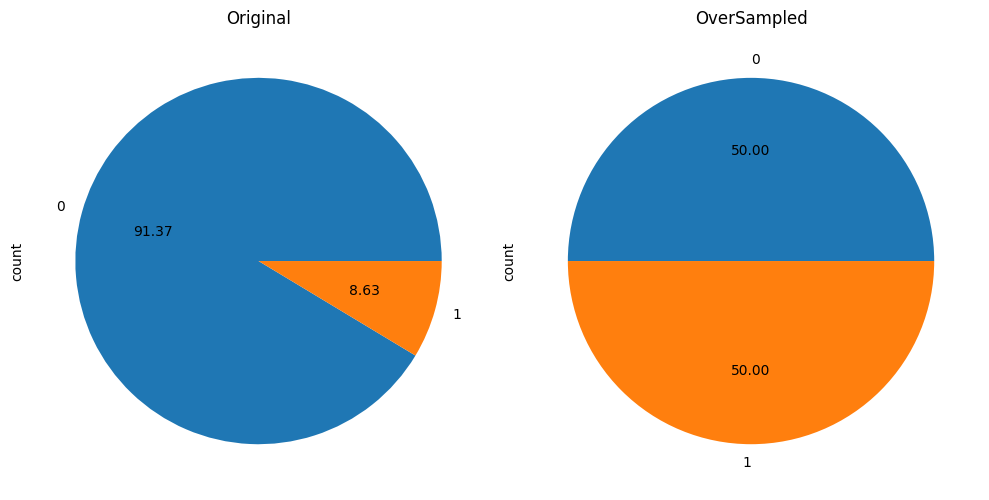

In [18]:
from imblearn.over_sampling import RandomOverSampler
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
autopct = "%.2f"
Y.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Original")

clf = Pipeline(steps=[("preprocessor", columns_transform),('scaler',StandardScaler())])
clf.fit(X_train, Y)
X_transformed = clf.transform(X)
Y_transformed = Y
X_res, y_res = RandomUnderSampler(sampling_strategy=1).fit_resample(X_transformed, Y_transformed)
y_res.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title("OverSampled")
print(X_res.shape, X_transformed.shape)
fig.tight_layout()

### **PCA**

- When dealing with datasets that have a large number of variables or features, **PCA** can be used to reduce the dimensionality of the data. It helps in identifying the most important variables that explain the maximum variance in the dataset, allowing for easier visualization and analysis. PCA can be used to extract a set of representative features from a larger set of variables. These new features, represented by the principal components, can capture the most essential information from the original data while reducing the complexity and computational requirements of subsequent analysis tasks.


<Axes: xlabel='component', ylabel='explained variance'>

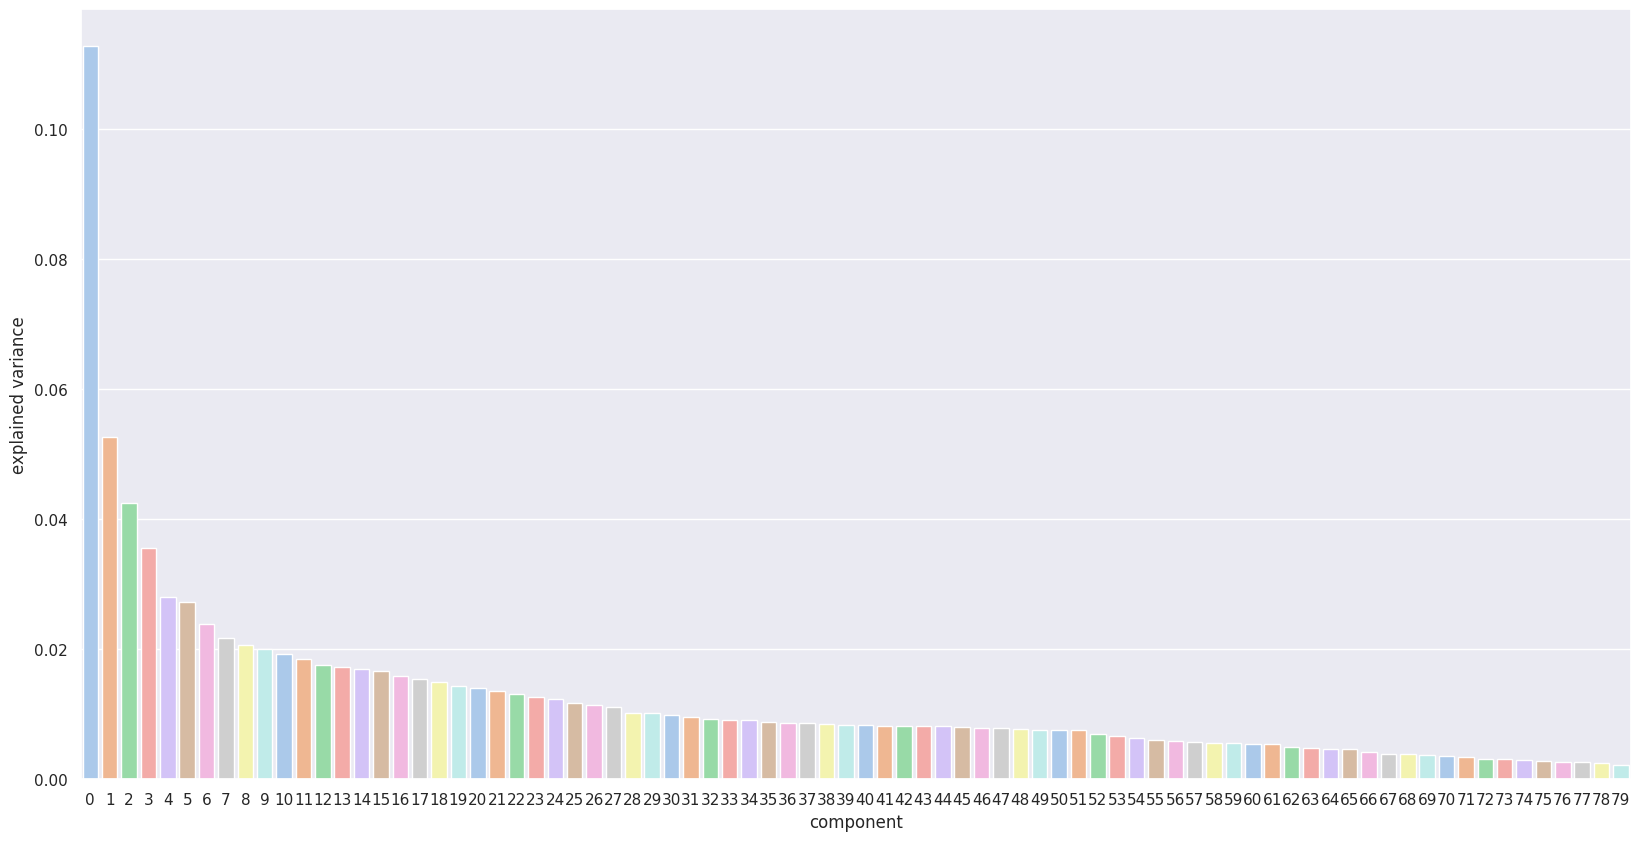

In [51]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
explained_variance_s=pca.explained_variance_ratio_
plt.figure(figsize=(20,10))
plt.ylabel("explained variance")
plt.xlabel("component")
sns.barplot(x=list(range(0, 80)), y=explained_variance_s[0:80], palette="pastel")

In PCA, a larger total explained variance ratio is generally considered a better result. A higher total explained variance ratio indicates that the selected principal components can better retain the variance information of the original data, thus effectively summarizing the characteristics of the original data.

By choosing a larger total explained variance ratio, you can ensure that more variance of the original data is preserved, while losing less information. This can be helpful in dimensionality reduction tasks to retain the most important features or in feature selection tasks to select features with the maximum information content.

However, the determination of the size of the total explained variance ratio also depends on the specific application and problem at hand. Sometimes, a smaller total explained variance ratio may already be sufficient to explain the main variations in the data, while a larger total explained variance ratio may introduce unnecessary complexity or overfitting.

We choose 50 commponents.

### **Heat Map(correlation)**

- Here we can analysis the correlations between different features, and use heat map to visualize it.The deeper color represent higher correlation.
We can find that age and heart rate is in deep green with hospital_death, which means they are higher relative to death. This makes sense.

<Axes: >

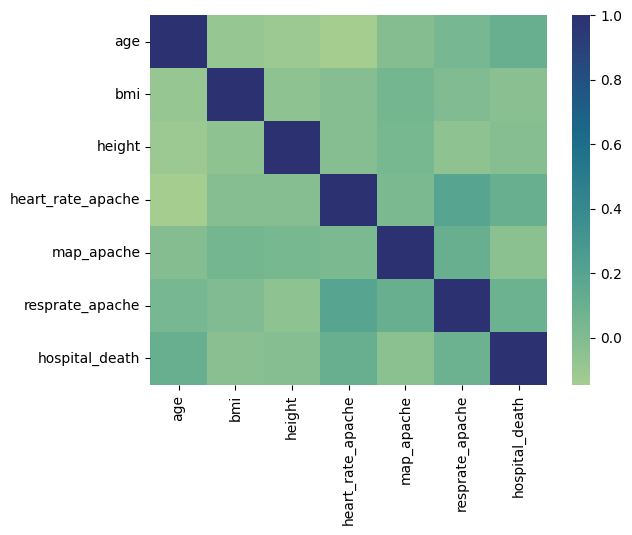

In [ ]:
corr_categorical = dataset_selected.select_dtypes(exclude=['object'])[["age","bmi","height","heart_rate_apache","map_apache","resprate_apache","hospital_death"]].corr()
sns.heatmap(corr_categorical,annot=False, cmap="crest")

### **Histograms**


- Here we want to insight distributions and correlations about some features.
Histograms benethe show the death and ethinicity distribution on the age.
We can find that age=60 is the majority. And it seems caucasian is more likely to be in severe healthy condition than others. 

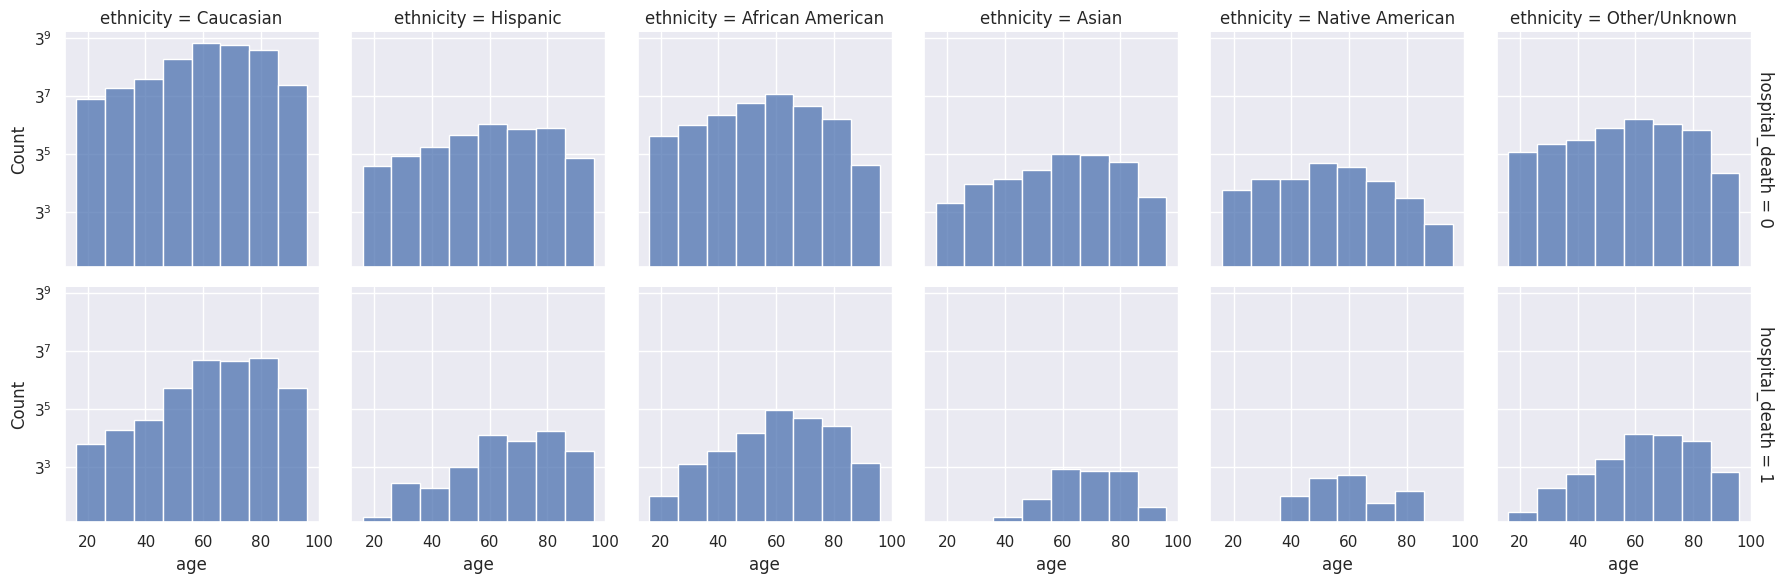

In [37]:
sns.set_theme(style="darkgrid")
dataset_selected
sns.displot(
    dataset_selected, x="age", col="ethnicity", row="hospital_death",log_scale=(0, 3),
    binwidth=10, height=3, facet_kws=dict(margin_titles=True),
)

### **Scatterplot Matrix**

- The scatterplot matrix can help us understand the distribution. What we can see in the scatters is that, we have just few points with positive label("death"), and it seems impossible to seperate them just only by any single feature.

Also we can see the distributions here show that a patient with heart rate=60 is very likely to be health, cause the distribution shows it reach the peak of the alive patients, but has a small possibility within death samples.

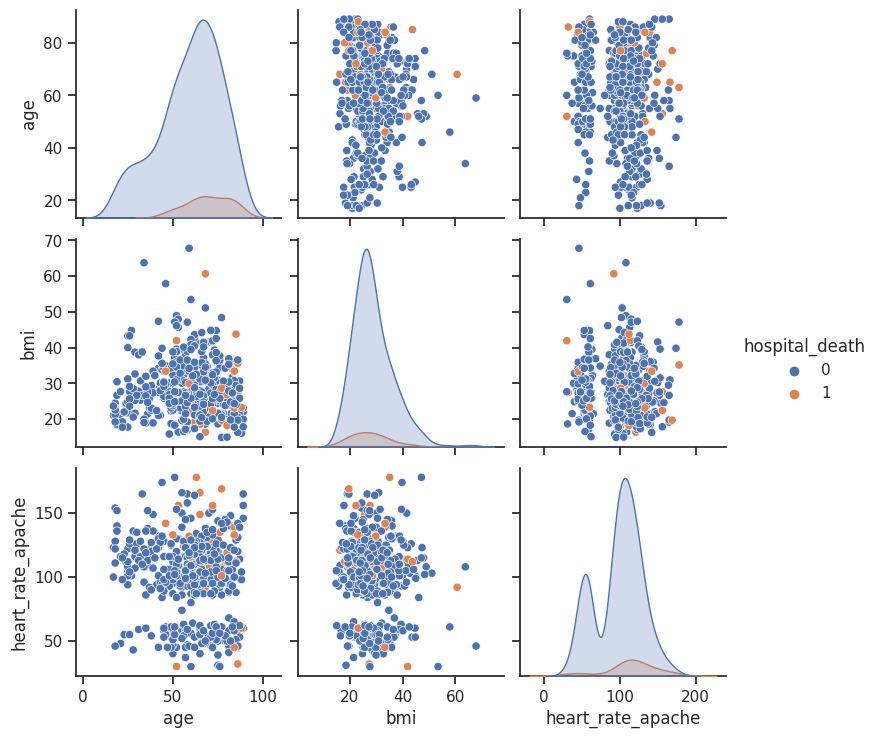

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(dataset_selected[["age","bmi","hospital_death","heart_rate_apache"]][::200], hue="hospital_death")

## **Modelling**

In [38]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import  metrics

In [39]:
classifiers = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
   
]

oversamples=[None,SMOTE(sampling_strategy=1.)]

In [40]:
labels= ["LR",
    "RandomForest",
    "DecisionTree"
        ]

In [41]:
categrary_columns_names_input = X.select_dtypes(include=['object']).columns.tolist()
number_columns_names_input = X.select_dtypes(exclude=['object']).columns.tolist()
columns_transform = ColumnTransformer(transformers=[('categories',OneHotEncoder(),categrary_columns_names_input),
          ('numbers',SimpleImputer(strategy='mean'),number_columns_names_input)])

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

### Hyperparameters Tuning

Hyperparameter tuning is necessary to optimize the performance of a machine learning model and improve its ability to generalize to new, unseen data. Here we use GridsearchCV to tune the hyperparameters.

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV


For **logistic regression**, we search two of hyperparameters.
To the best of our knowledge, for a logistic regression model, the regularization parameter (denoted as c) will affect the performance of the model. Smaller value of `C` indicates stronger regularization, which can help prevent overfitting by reducing the model's complexity and make it less sensitive to noise and outliers in the training data; And a larger value of C indicates weaker regularization, which can potentially result in better fitting the training data, especially if the data is complex or noisy. 

Also, we tune the parameter `solver` , comparing 'lbfgs' and 'newton-cholesky'. 'lbfgs' stands for Limited-memory Broyden-Fletcher-Goldfarb-Shanno algorithm. It is a quasi-Newton method optimization algorithm that updates the model's parameters by approximating the inverse of the Hessian matrix. It is generally suitable for small-to-medium-sized datasets; 'newton-cholesky' is a variant of the Newton's method. It uses Cholesky decomposition to solve the Hessian matrix and iteratively update the parameters. This algorithm is typically used for datasets with a large number of features.

For both a **random forest** and **decision tree** model, we try to tune the maximum depth of the decision tree (denoted as max_depth), as well as the criterion used to evaluate the quality of a split at each node of the decision tree (denoted as criterion). As what we have learnt in the lecture, maximum depth of the decision tree can help control the complexity and the generalization ability of the model. Usually smaller values of max_depth can prevent overfitting by reducing the model's sensitivity to noise and details in the training data. 



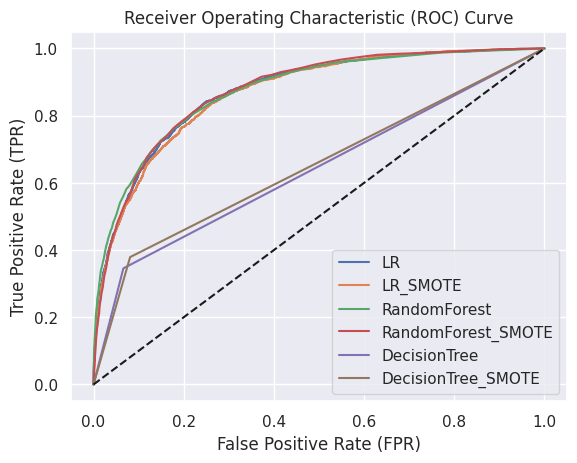

,Method,Precision,Recall,F1,Accuracy,Oversampling,AUC,Time,Best Params
0,LR,0.646003,0.250158,0.360656,0.923459,None,0.872666,24.52s,"{'C': 0.01, 'solver': 'lbfgs'}"
1,LR_SMOTE,0.259683,0.775111,0.389030,0.789893,SMOTE(sampling_strategy=1.0),0.867847,58.79s,"{'C': 1, 'solver': 'newton-cholesky'}"
2,RandomForest,0.728546,0.262792,0.386258,0.927929,None,0.875209,319.08s,{'max_depth': 50}
3,RandomForest_SMOTE,0.499632,0.428932,0.461591,0.913646,SMOTE(sampling_strategy=1.0),0.875145,741.97s,{'max_depth': None}
4,DecisionTree,0.330314,0.345546,0.337759,0.883062,None,0.639688,52.85s,{'criterion': 'entropy'}
5,DecisionTree_SMOTE,0.306279,0.379027,0.338792,0.872322,SMOTE(sampling_strategy=1.0),0.648971,113.02s,{'criterion': 'entropy'}


In [49]:
classifiers = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
]

parameters = [
    {'C': [0.001, 0.01, 0.1, 1, 10],
     "solver": ['lbfgs', 'newton-cholesky']},
    {'max_depth': [50, None],},
    { 'criterion': ['gini', 'entropy']}
]

oversamples = [None, SMOTE(sampling_strategy=1.)]
labels = ["LR","LR_SMOTE",
      "RandomForest", "RandomForest_SMOTE",
      "DecisionTree", "DecisionTree_SMOTE"]
oversampling = []
names = []
precision = []
recall = []
f1 = []
accuracy = []
auc_scores = []
time_ = []
best_params = []
i = 0

pipeline = Pipeline(steps=[("preprocessor", columns_transform),('scaler',StandardScaler())])
pipeline.fit(X_train, Y_train)


pipeline.fit(X_test, Y_test)
X_test_transformed = pipeline.transform(X_test)
for classifier, parameter in zip(classifiers, parameters):
    for over in oversamples:
      i += 1
      X_train_transformed = pipeline.transform(X_train)
      Y_train_transformed = Y_train
      start_time = time.time()
      if(over != None):
        X_train_transformed, Y_train_transformed = over.fit_resample(X_train_transformed, Y_train_transformed)
        # X_test_transformed = over.fit_resample(X_test, y)
      clf = GridSearchCV(classifier, parameter)
      clf.fit(X_train_transformed, Y_train_transformed)
      
      end_time = time.time()
      best_model = clf.best_estimator_    
      y_pred = best_model.predict(X_test_transformed)
      precision.append(metrics.precision_score(Y_test, y_pred))
      recall.append(metrics.recall_score(Y_test, y_pred))
      f1.append(metrics.f1_score(Y_test, y_pred))
      accuracy.append(metrics.accuracy_score(Y_test, y_pred))
      names.append(f'{labels[i-1]}')
      oversampling.append(f'{over}')
      time_.append(f'{round(end_time - start_time, 2)}s')
      fpr, tpr, thresholds = roc_curve(Y_test, best_model.predict_proba(X_test_transformed)[:, 1], drop_intermediate=False)
      auc_scores.append(roc_auc_score(Y_test, best_model.predict_proba(X_test_transformed)[:, 1]))

      best_params.append(clf.best_params_)
      plt.plot(fpr, tpr, label=labels[i-1])
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

disp = {
    'Precision': precision, 
    'Recall': recall, 
    'F1': f1,
    'Accuracy': accuracy,
    'Oversampling': oversampling,
    'AUC': auc_scores,
    'Time': time_,
    'Best Params': best_params
}

result_grid_search = pd.DataFrame(data=disp)
result_grid_search.insert(loc=0, column='Method', value=names)
result_grid_search

In [54]:
result_grid_search.describe()

,Precision,Recall,F1,Accuracy,AUC
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.461743,0.406928,0.379014,0.885052,0.796588
std,0.194341,0.192842,0.046106,0.051677,0.118006
min,0.259683,0.250158,0.337759,0.789893,0.639688
25%,0.312288,0.283481,0.344258,0.875007,0.703690
50%,0.414973,0.362287,0.373457,0.898354,0.870257
75%,0.609410,0.416456,0.388337,0.921005,0.874525
max,0.728546,0.775111,0.461591,0.927929,0.875209


### Neural Network

We design a 4 layers MLP to implement the binary classifier. We tried to utilize the power of the deep learning to help us build a better model.

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim

device = "cpu"
if torch.cuda.is_available():
    # get the current device
    device = torch.cuda.current_device()
# A binary classifier, with 3 layers, using batch normalization and dropout
class BinaryMLP(nn.Module):
    def __init__(self, input_size, dropout_prob=0.5):
        super(BinaryMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, int(input_size*4))
        self.bn1 = nn.BatchNorm1d(int(input_size*4))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(int(input_size*4), int(input_size*2))
        self.bn2 = nn.BatchNorm1d(int(input_size*2))
        # self.attention = nn.MultiheadAttention(int(input_size*2), num_heads=1)
        self.fc3 = nn.Linear(int(input_size*2), int(input_size))
        self.bn3 = nn.BatchNorm1d(int(input_size))
        self.fc4 = nn.Linear(int(input_size), 1)

    def forward(self, x):
        out = self.dropout(self.relu(self.bn1(self.fc1(x))))
        out = self.dropout(self.relu(self.bn2(self.fc2(out))))
        # out,_ = self.attention(out,out,out)
        out = self.dropout(self.relu(self.bn3(self.fc3(out))))
        out = self.fc4(out)
        out = torch.sigmoid(out)
        return out.squeeze()
    def extract_feature(self, x):
        out = self.dropout(self.relu(self.bn1(self.fc1(x))))
        out = self.dropout(self.relu(self.bn2(self.fc2(out))))
        out,_ = self.attention(out,out,out)
        return out

In [ ]:
# load data
from torch.utils.data import Dataset

class Patient_Dataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

def data_to_tensor(dataset):
  dataset_tensor = torch.tensor(np.array(dataset), dtype=torch.float32).to(device)
  return dataset_tensor

def reset_nn_params(model):
  for layer in model.children():
    if hasattr(layer, 'reset_parameters'):
      layer.reset_parameters()

torch.cuda.empty_cache()

time_ = []
i=0
oversamples = [SMOTE(sampling_strategy=1), SMOTE(sampling_strategy=1), 
               SMOTE(sampling_strategy=1),SMOTE(sampling_strategy=1)]

clf = Pipeline(steps=[("preprocessor", columns_transform),('scaler',StandardScaler())])
clf.fit(X_train, Y_train)
X_transformed_train = clf.transform(X_train)
Y_transformed_train = Y_train
X_transformed_test = clf.transform(X_test)
patient_test_set = Patient_Dataset(data_to_tensor(X_transformed_test), torch.tensor(np.array(Y_test), dtype=torch.float32).to(device))

# set hyperparameters
input_size = patient_train_set.X.shape[-1]
num_epochs = 10
batch_size = 1000
learning_rate = [0.01, 0.005, 0.001, 0.0001]

test_loader = DataLoader(patient_test_set, batch_size=batch_size)

X_smote_list = [oversamples[i].fit_resample(X_transformed_train, Y_transformed_train)
                for i in range(len(oversamples)) ]
patient_train_sets_SMOTE = [Patient_Dataset(data_to_tensor(X_smote_i), 
                                      torch.tensor(np.array(Y_smote_i), dtype=torch.float32).to(device))
                      for X_smote_i, Y_smote_i in X_smote_list]
patient_train_sets_ori = [Patient_Dataset(data_to_tensor(X_transformed_train), 
                                      torch.tensor(np.array(Y_transformed_train), dtype=torch.float32).to(device))]*4


model_SMOTE = BinaryMLP(input_size, dropout_prob=0.5).to(device)
model = BinaryMLP(input_size, dropout_prob=0.5).to(device)

In [ ]:
# train the model_SMOTE
j = 0
iter = 0
loss_values = np.array([])
df_model_labels = np.array([])
iteration_values = np.array([])

model_labels = [
    "Round_1_balance",
    "Round_2_balance",
    "Round_3_balance",
    "Round_4_balance"
]

for train_set in patient_train_sets_SMOTE:
  # network = models[0]
  optimizer = optim.Adam(model_SMOTE.parameters(), lr=learning_rate[j])
  train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
  print(len(train_set))
  criterion = nn.BCELoss()
  iter = 0
  for epoch in range(num_epochs):
      for i, (inputs, labels) in enumerate(train_loader):
          # forward pass
          outputs = model_SMOTE(inputs)
          loss = criterion(outputs, labels)
          # backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          loss_values = np.append(loss_values, loss.item())
          df_model_labels = np.append(df_model_labels, model_labels[j])
          iteration_values = np.append(iteration_values, iter)
          iter += 1
  j += 1

loss_df_SMOTE = pd.DataFrame({'Iteration': iteration_values, 'Loss': loss_values,
                          'model_labels': df_model_labels})
j = 0
iter = 0
loss_values = np.array([])
df_model_labels = np.array([])
iteration_values = np.array([])

model_labels = [
    "Round_1_original",
    "Round_2_original",
    "Round_3_original",
    "Round_4_original"
]

for train_set in patient_train_sets_ori:
  # network = models[0]
  optimizer = optim.Adam(model.parameters(), lr=learning_rate[j])
  train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
  print(len(train_set))
  criterion = nn.BCELoss()
  iter = 0
  for epoch in range(num_epochs):
      for i, (inputs, labels) in enumerate(train_loader):
          # forward pass
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          # backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
          loss_values = np.append(loss_values, loss.item())
          df_model_labels = np.append(df_model_labels, model_labels[j])
          iteration_values = np.append(iteration_values, iter)
          iter += 1
  j += 1

loss_df = pd.DataFrame({'Iteration': iteration_values, 'Loss': loss_values,
                          'model_labels': df_model_labels})

#### Blended differnet neural network (Bagging)

Due to the label imbalance of our original dataset, a neural network trained on it will have a higher `Precision` but lower `Recall`(only 10% positive label in dataset).

Here comes an idea, that we can collect two classifiers, one of them is trained on the original dataset, another, which will focus more on negative label, since is trained on the oversampled dataset.

/tmp/ipykernel_17844/2618985488.py:7: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=loss_df, x='Iteration', y='Loss', hue="model_labels", ax=ax1, palette=palette)
/tmp/ipykernel_17844/2618985488.py:8: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=loss_df_SMOTE, x='Iteration', y='Loss', hue="model_labels", ax=ax2, palette=palette)


<Axes: xlabel='Iteration', ylabel='Loss'>

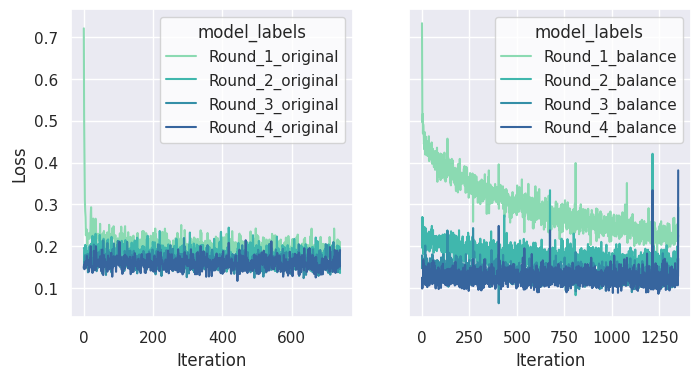

In [ ]:
import matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(8, 4)
palette = sns.color_palette("mako_r", 6)

sns.set_theme(style="ticks")
sns.lineplot(data=loss_df, x='Iteration', y='Loss', hue="model_labels", ax=ax1, palette=palette)
sns.lineplot(data=loss_df_SMOTE, x='Iteration', y='Loss', hue="model_labels", ax=ax2, palette=palette)

After that, we will make **ensemble learning** on them, and thus get a robuster model.

In [ ]:
with torch.no_grad():
    dfs = []
    upper_p = 1-1e-1
    lowwer_p = 0.5
    weights = [0.65, 0.35]
    for i in range(3):
        correct = 0
        total = 0
        outputs_numpy = np.array([])
        for inputs, labels in test_loader:
            if(i == 0):
                outputs = model(inputs)
            elif(i == 1):
                outputs = model_SMOTE(inputs)
            else:
                input_copy = torch.empty_like(inputs)
                input_copy.copy_(inputs)
                outputs = model(inputs)
                outputs_smote = model_SMOTE(input_copy)
                # outputs = model_SMOTE(input_copy)
                # outputs_ori = model(inputs)
                mask = outputs_smote>upper_p
                outputs[mask] = weights[0] * outputs[mask] + \
                                weights[1] *outputs_smote[mask]

                # outputs[model_SMOTE(inputs)>upper_p] = 1.
                # outputs[model_SMOTE(inputs)>upper_p] = 1.
            outputs_numpy = np.append(outputs_numpy, outputs.cpu().numpy())
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f'Test Accuracy: {100 * correct / total}%')
        
        precision = []
        recall = [] 
        f1 = [] 
        accuracy = []  
        
        precision.append(metrics.precision_score(Y_test, (outputs_numpy>0.5)))
        recall.append(metrics.recall_score(Y_test, (outputs_numpy>0.5)))
        f1.append( metrics.f1_score(Y_test, (outputs_numpy>0.5)))
        accuracy.append(metrics.accuracy_score(Y_test, (outputs_numpy>0.5)))
        fpr, tpr, thresholds = roc_curve(Y_test, outputs_numpy,drop_intermediate=False)
        auc = roc_auc_score(Y_test, outputs_numpy)
        disp = {'Precision': precision, 
        'Recall': recall, 
        'F1': f1,
        'Accuracy' : accuracy,
        'AUC':auc,
        }
        dfs.append(pd.DataFrame(data=disp))
dataframes = pd.concat(dfs)
dataframes.insert(0, "Method",["Original", "SMOTE:1", "Blended"])
dataframes.set_index("Method")

Test Accuracy: 92.38946737174945%
Test Accuracy: 61.51665485471297%
Test Accuracy: 90.37780079594395%


,Precision,Recall,F1,Accuracy,AUC
Method,,,,,
Original,0.609871,0.327858,0.426459,0.923895,0.867651
SMOTE:1,0.162142,0.830069,0.271291,0.615167,0.784465
Blended,0.448471,0.500316,0.472977,0.903778,0.845097


# Results

## Subsection 1

## Neural Network

Due to the label imbalance of our original dataset, a neural network trained on it will have a higher `Precision` but lower `Recall`(only 10% positive label in dataset).

Here comes an idea, that we can collect two classifiers, one of them is trained on the original dataset, another, which will focus more on negative label, since is trained on the oversampled dataset.

After that, we make **ensemble learning** to blended them, and thus get a robuster model. We set up a Confidence interval for both `Original` and `SMOTE:1` model. Just like voting, we make decision on a input depends on which model is more confident, based on its confidence interval.

Here we can see from the table, that the `Blended` model have both higher Precision than `SMOTE:1`, and higher Recall than `Original`. Though the accuracy of blended model is slightly lower than original one, but it's `F1` score make it robust.

In [ ]:
dataframes = pd.concat(dfs)
dataframes.insert(0, "Method",["Original", "SMOTE:1", "Blended"])
dataframes.set_index("Method")
dataframes

Test Accuracy: 92.38946737174945%
Test Accuracy: 61.51665485471297%
Test Accuracy: 90.37780079594395%


,Precision,Recall,F1,Accuracy,AUC
Method,,,,,
Original,0.609871,0.327858,0.426459,0.923895,0.867651
SMOTE:1,0.162142,0.830069,0.271291,0.615167,0.784465
Blended,0.448471,0.500316,0.472977,0.903778,0.845097


## Subsection 3

## Subsection 4

## Subsection 5

# Discussion

## Interpreting the result

By employing logistic regression, decision tree, and random forest, we develop a prediction model for in-hospital mortality among admitted patients. 



**Random Forest & OverSampling**

Random Forest has the best performance overall.
After addressing the issue of label imbalance using the SMOTE algorithm, the model's recall and F1 score have reached high levels. It is noteworthy that the precision of the Random Forest with SMOTE is relatively average compared to other models, but its recall and F1 score perform well. 

We are less concerned about precision and place greater emphasis on the model's recall because identifying every possible death case is of significant practical importance. We need hospitals to pay heightened attention to every high-risk patient, and the performance of the Random Forest model aligns well with our requirements.

It is also worth noting that we observed improvements in the performance of each model after addressing the issue of label imbalance using the SMOTE algorithm. This indicates that applying the SMOTE algorithm in this context is both reasonable and meaningful.


**Cross Validation**

Within the process of grid search, we have applied our models training and validating based on cross validation. The best models for different algorithms selected by hyperparameters tuning(Grid Search) have robutness. Thus, we didn't cost much more time on applying nest cross validation to help us choose the best algorithm. We focus more on the oversampling method, which is the major infulence factor for our dataset, and could improve the F1 score obviously.

## Limitations

1. Random Forest models have limited interpretability, making it challenging to understand and explain their predictions compared to simpler models. The ensemble nature and complex interactions among decision trees in a Random Forest hinder clear insights into feature importance and the underlying decision-making process. It may pose difficulties for clinical judgment. 

2. About 77% of the individuals in the dataset are Caucasian. In a clinical setting, our model may not perform well in predicting the survival outcomes for other ethnicities.


3. The complexity of the grid searches was reduced due to the extensive computational time required by complex models and the large volume of data. As a result, we only included a limited number of variables in our grid search process.

## Ethics & Privacy

Lost of ethical perspective should be considered carefully. 

 

For example, the inform consent. We need to fully inform patients that the purpose of data collection is to analyse health conditions. Patients should have the right to make informed decisions about participation. Our dataset analyses the test results of many patients, but this data, as a patient's private health status, may have been collected without the patient's permission. 

 

Also, the bias in regional population distribution and the unevenness of the sample may lead to some racial discrimination. Our model may predict that a particular race is more severely ill overall.  

 

Thinking more deeply, we may even have an impact that goes far beyond the purpose of 'health assessment', for example, our model may have a higher mortality rate for some patients, but this may lead some nefarious medical institutions to abandon treatment for these patients.

## Conclusion

By using 3 machine learning models, we aimed to develop and validate a prediction model for all-cause in-hospital mortality among admitted patients. We evaluated the performance based on f1 score and recall instead of accuracy, for the judgment of death cases was highly important. We use grid search for hyperparameters tuning and algorithm selection. The results showed that random forest was the best model. Also, eliminating label imbalance can improve model performance and robustness.

# Extra Credit Justification

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Kalantar-Zadeh, Kamyar; Kopple, Joel D; Block, Gladys; Humphreys, Michael H. Association Among SF36 Quality of Life Measures and Nutrition, Hospitalization, and Mortality in Hemodialysis. Journal of the American Society of Nephrology 12(12):p 2797-2806, December 2001. | DOI: 10.1681/ASN.V12122797 

<a name="admonishnote"></a>2.[^](#admonish): Subbe, C.P., Duller, B. & Bellomo, R. Effect of an automated notification system for deteriorating ward patients on clinical outcomes. Crit Care 21, 52 (2017).

<a name="sotanote"></a>3.[^](#sota): Patil SP, Krishnan JA, Lechtzin N, Diette GB. In-Hospital Mortality Following Acute Exacerbations of Chronic Obstructive Pulmonary Disease. Arch Intern Med. 2003;163(10):1180–1186. doi:10.1001/archinte.163.10.1180
